In [1]:
import numpy as np
from statsmodels.api import OLS, RLM, GLS
from plotnine import *
import pandas as pd
import statsmodels.api as sm

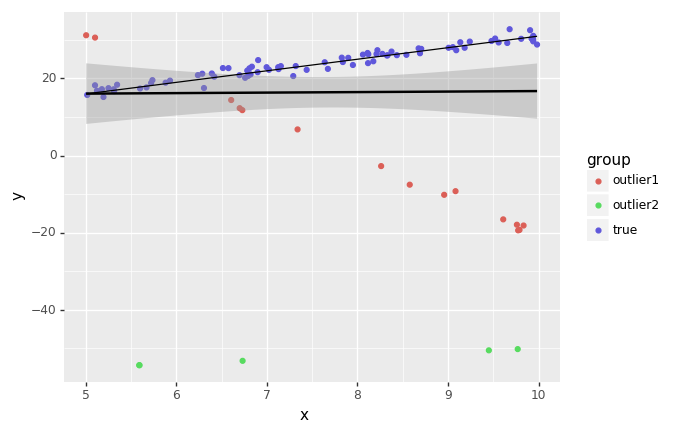

<ggplot: (-9223371889690397545)>

In [2]:
x = np.random.random(100) * 5 + 5
y_error = np.concatenate([np.random.randn(95) * 1.1, np.abs(np.random.randn(5)) * 30])
y = np.concatenate([x[:15] * - 10 + y_error[:15] + 80, x[15:95] * 3 + y_error[15:95] + 1, x[95:] - 60])
line_color = [1] * 100
y_true = x * 3 + 1
df = pd.DataFrame({'x': x, 'y': y, 'y_true': y_true, 'group': ['outlier1'] * 15 + ['true'] * 80 + ['outlier2'] * 5, 'line_color': line_color})
ggplot(df, aes(x='x', y='y')) + geom_point(aes(color='group')) + geom_smooth(method='lm') + stat_function(fun=lambda x: x * 3 + 1)

In [3]:
robust_norm_dict = {
    'AndrewWave': sm.robust.norms.AndrewWave,
    'Hampel': sm.robust.norms.Hampel,
    'HuberT': sm.robust.norms.HuberT,
    'LeastSquares': sm.robust.norms.LeastSquares,
    'RamsayE': sm.robust.norms.RamsayE,
    #'RobustNorm': sm.robust.norms.RobustNorm,
    'TrimmedMean': sm.robust.norms.TrimmedMean,
    'TurkeyBiweight': sm.robust.norms.TukeyBiweight
}

params_result = []
for key, value in robust_norm_dict.items():
    params_result.append(tuple(RLM(df['y'], 
                                   sm.add_constant(df['x']), 
                                   M=value()).fit().params.tolist() + \
                               [key]))
    df[key] = key
df['true'] = 'true'

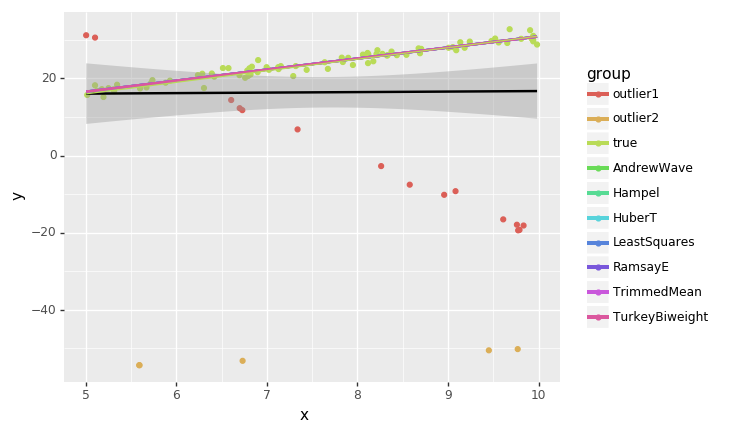

<ggplot: (147164378281)>

In [4]:
p = ggplot(df, aes(x='x', y='y')) + \
    geom_point(aes(color='group')) + \
    geom_smooth(method='lm')
    

for params in params_result:
    p += stat_function(aes(color=params[2]), fun=lambda x: params[0] + params[1] * x, size=1)
    
p + stat_function(aes(color='true'), fun=lambda x: x * 3 + 1) 

In [6]:
from sklearn.linear_model import HuberRegressor, RANSACRegressor,TheilSenRegressor

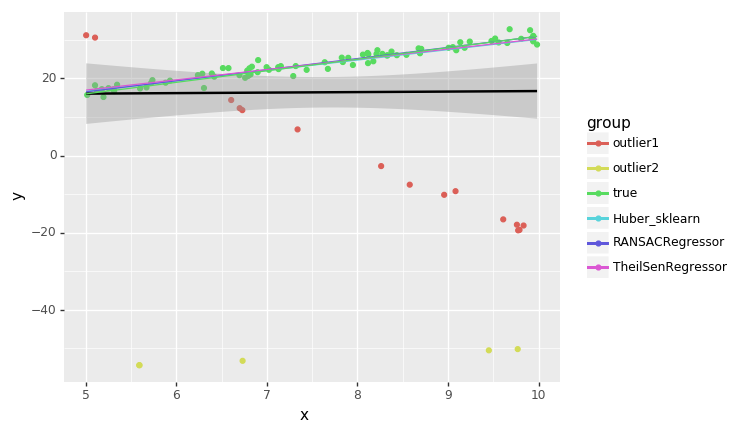

<ggplot: (147164378127)>

In [10]:
sklearn_method_dict = {
    'Huber_sklearn': HuberRegressor,
    'RANSACRegressor': RANSACRegressor,
    'TheilSenRegressor': TheilSenRegressor
}
for key, value in sklearn_method_dict.items():
    df[key + '_predict'] = value().fit(df[['x']], df['y']).predict(df[['x']])
    df[key] = key
df['true'] = 'true'

p = ggplot(df, aes(x='x', y='y')) + \
    geom_point(aes(color='group')) + \
    geom_smooth(method='lm')
    

for key in sklearn_method_dict:
    p += geom_line(aes(color=key, y=df[key + '_predict']))
    
p + stat_function(aes(color='true'), fun=lambda x: x * 3 + 1) 